In [1]:
import pandas as pd
import config
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.mpl.rc("figure",figsize=(16,6))
sns.set_style("darkgrid")

In [2]:
client_credentials_manager = SpotifyClientCredentials(client_id=config.client_id, client_secret=config.api_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [32]:
#playlist_link = "https://open.spotify.com/playlist/1ZcUPOHzmLOPceuT9OvSW4?si=29f7c8a5a12b4f13&nd=1"
playlist_link = "https://open.spotify.com/playlist/47ciDeflyfDe0lFBH9Inrb?si=e90a08e872bb406e"
#playlist_link ="https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=b29d4a5899c94b56"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [33]:
pop=[]
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]

    #Track name
    track_name = track["track"]["name"]

    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)

    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]

    #Album
    album = track["track"]["album"]["name"]

    #Popularity of the track
    track_pop = track["track"]["popularity"]
    pop.append(track_pop)
    print(track_name, " / ", artist_name,"/", album, "/", track_pop)

Ocean Drive  /  Miami Nights 1984 / Turbulence / 52
Shelter  /  Porter Robinson / Shelter / 64
Divinity  /  Porter Robinson / Worlds / 53
Sad Machine  /  Porter Robinson / Worlds / 59
Years Of War  /  Porter Robinson / Worlds / 46
Flicker  /  Porter Robinson / Worlds / 48
Polygon Dust  /  Porter Robinson / Worlds / 42
Lionhearted  /  Porter Robinson / Worlds / 48
Rollin (feat. Future & Khalid)  /  Calvin Harris / Funk Wav Bounces Vol.1 / 63
Color  /  Grant / Color / 45
Wait  /  Lemaitre / Singularity / 30
The One (feat. Sneaky Sound System)  /  The Knocks / Comfortable / 30
Giorgio by Moroder  /  Daft Punk / Random Access Memories / 64
Technicolor  /  Madeon / Adventure (Deluxe) / 41
Leave This Place  /  LIONE / Leave This Place / 40
Particle Arts  /  Virtual Self / Virtual Self / 40
Rush Over Me  /  Seven Lions / Rush Over Me / 56
ANGEL VOICES  /  Virtual Self / ANGEL VOICES / 43
Say My Name (feat. Zyra)  /  ODESZA / In Return / 62
The Thrill - Porter Robinson Remix  /  NERO / The Thr

In [38]:
df1 = pd.DataFrame()
df1['Mie'] = pop
#df['MinePL'] = 0

In [39]:
df=pd.concat([df,df1], axis=1)

In [ ]:
print(sp.audio_features(track_uris[1]))

<AxesSubplot:ylabel='Density'>

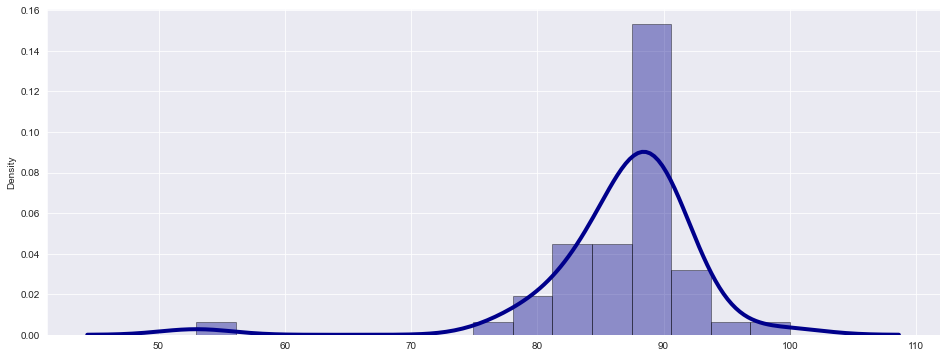

In [23]:

sns.distplot(pop, hist=True, kde=True,
             bins=15, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<AxesSubplot:ylabel='Density'>

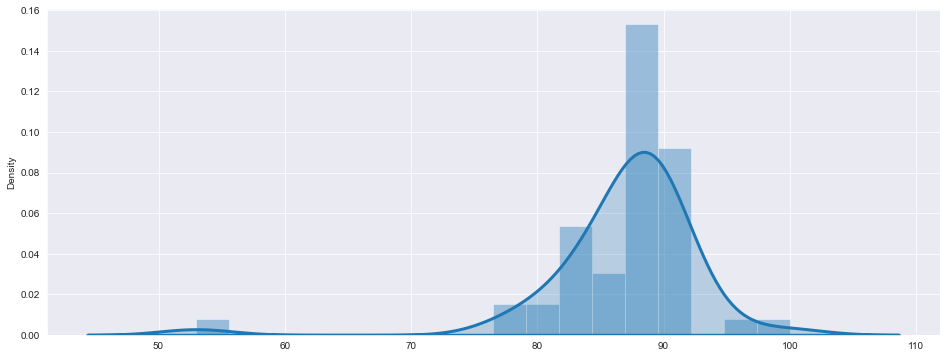

In [25]:
sns.distplot(pop, hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

In [42]:
df.head(5)

,top_world,Mie
0,100,52.0
1,95,64.0
2,90,53.0
3,88,59.0
4,80,46.0


In [41]:
del(df['MinePL'])

array([[<AxesSubplot:title={'center':'top_world'}>,
        <AxesSubplot:title={'center':'Mie'}>]], dtype=object)

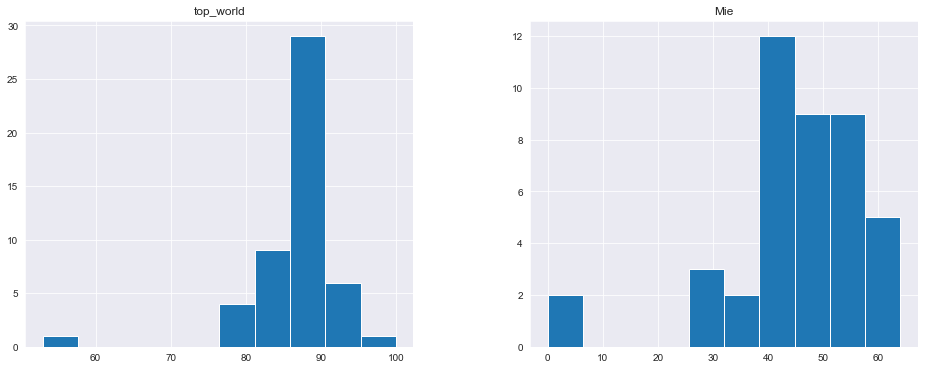

In [43]:
df.hist()